In [1]:
from trl import SFTTrainer
from datasets import load_dataset

dataset = load_dataset("trl-lib/Capybara", split="train")

/Users/geraldamasi/PycharmProjects/RL/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset

Dataset({
    features: ['source', 'messages', 'num_turns'],
    num_rows: 15806
})

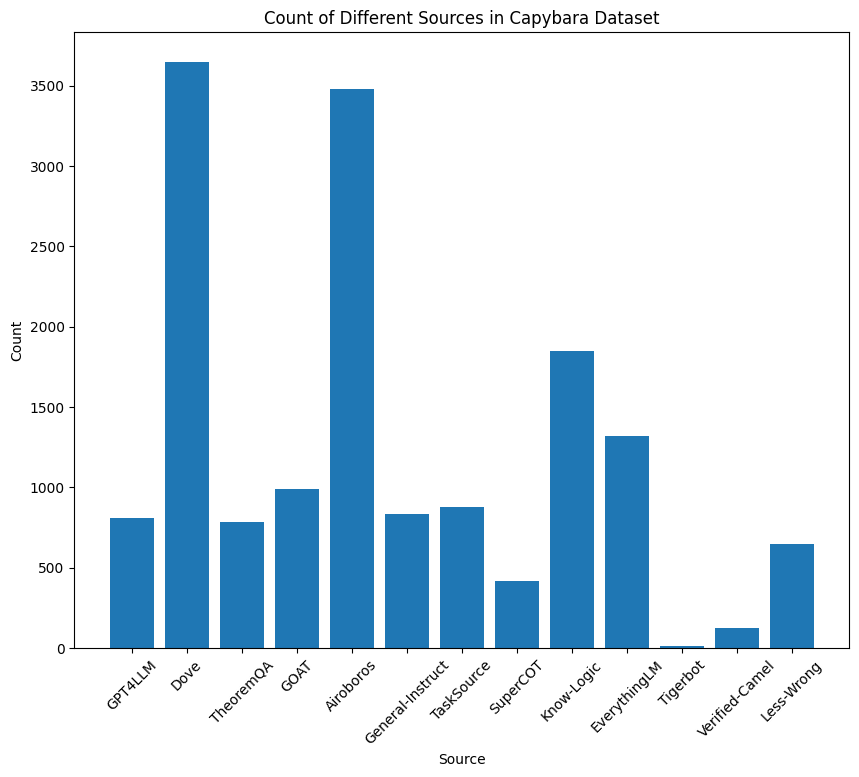

In [3]:
# Plot the count of different sources in the dataset
import matplotlib.pyplot as plt
sources = set(dataset['source'])
source_counts = {source: dataset['source'].count(source) for source in sources}
plt.figure(figsize = (10,8))
plt.bar(source_counts.keys(), source_counts.values())
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Count of Different Sources in Capybara Dataset')
plt.xticks(rotation = 45)
plt.show()
# dataset['source']

In [4]:
trainer = SFTTrainer(
    model='Qwen/Qwen2.5-0.5B',
    train_dataset=dataset,
)
trainer.train()

Truncating train dataset: 100%|██████████| 15806/15806 [00:00<00:00, 380198.25 examples/s]
The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'bos_token_id': None, 'pad_token_id': 151643}.
/Users/geraldamasi/PycharmProjects/RL/.venv/lib/python3.13/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss


RuntimeError: MPS backend out of memory (MPS allocated: 20.59 GiB, other allocations: 5.15 GiB, max allowed: 30.19 GiB). Tried to allocate 4.64 GiB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).

In [1]:
import torch
torch.__version__

'2.9.1'